### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
diffs = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diffs.append(coff_mean - nocoff_mean)
    
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5) 
# statistical evidence coffee drinkers are on average taller

(0.10258900080921124, 2.5388333707966568)

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

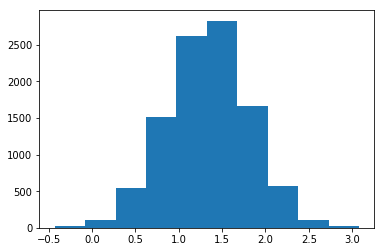

In [4]:
plt.hist(diffs)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [5]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_mean = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] != '<21']['height'].mean()
    diffs_age.append(over21_mean - under21_mean)
    
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)
# statistical evidence that over21 are on average taller

(3.3652749452554795, 5.0932450670661495)

(array([    8.,    47.,   329.,  1196.,  2589.,  3083.,  1903.,   714.,
          117.,    14.]),
 array([ 2.84743507,  3.11400025,  3.38056542,  3.64713059,  3.91369577,
         4.18026094,  4.44682611,  4.71339129,  4.97995646,  5.24652163,
         5.51308681]),
 <a list of 10 Patch objects>)

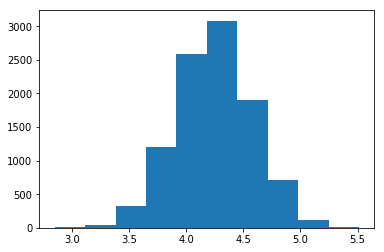

In [6]:
plt.hist(diffs_age)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [7]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0593651244624267, 2.5931557940679042)

(array([  3.00000000e+00,   5.00000000e+01,   3.44000000e+02,
          1.28300000e+03,   2.52300000e+03,   3.01100000e+03,
          1.98000000e+03,   6.80000000e+02,   1.15000000e+02,
          1.10000000e+01]),
 array([ 0.21225132,  0.52377323,  0.83529515,  1.14681707,  1.45833899,
         1.76986091,  2.08138283,  2.39290475,  2.70442667,  3.01594859,
         3.32747051]),
 <a list of 10 Patch objects>)

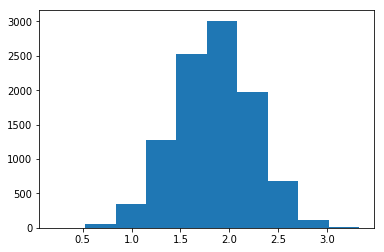

In [8]:
plt.hist(diffs_coff_under21)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [9]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)
    
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the over21 group, we have evidence that on average the non-coffee drinkers are taller

(1.8278953970883667, 4.4026329654774337)

(array([  3.00000000e+00,   1.00000000e+02,   9.26000000e+02,
          3.36100000e+03,   3.92000000e+03,   1.48100000e+03,
          1.91000000e+02,   1.50000000e+01,   2.00000000e+00,
          1.00000000e+00]),
 array([ 0.17351844,  0.8855739 ,  1.59762935,  2.30968481,  3.02174027,
         3.73379573,  4.44585119,  5.15790665,  5.86996211,  6.58201757,
         7.29407303]),
 <a list of 10 Patch objects>)

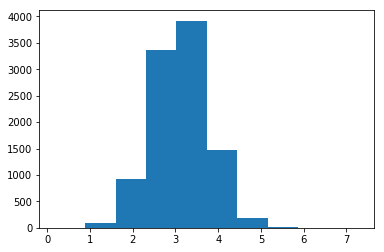

In [10]:
plt.hist(diffs_coff_over21)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

A larger idea for this is the idea of confounding variables altogether.  You will learn even more about these in the regression section of the course.